# Ranking scores split by density (D3)
### Lower and higher than a value and plotting each group to comparison
---

### Declaring all functions

In [1]:
get_dataset_names <- function(split, dataset_names_all){
    low_d    <- list()
    high_d   <- list()
    low_high <- list()
    for (d in names(dataset_names_all)){
        if(as.numeric(d) >= split){
            low_d  <- c(low_d,dataset_names_all[[d]])
        }else{ # as.numeric(d) < split
            high_d <- c(high_d,dataset_names_all[[d]])
        }
    }
    low_high[[1]] <- low_d
    low_high[[2]] <- high_d
    return(low_high)
}

In [2]:
cantao_plot <- function(dataset, x_data, y_data, group_by_data, group_by_label, measure='mean', visu='points'){
    require(ggplot2)
    require(gridExtra)
    if(visu == 'points'){
        #require loads the package only if its not already loaded
        require(FSA)
        Sum = Summarize(y_data ~ x_data + group_by_data, data=dataset)
        #standard error
        #Sum$se = Sum$sd / sqrt(Sum$n)
        require(dplyr)
        Sum <- Sum %>%
        group_by(x_data) %>%
        mutate(width = 0.5 * as.numeric(x_data))
      if(measure == 'mean'){
          y_data  = Sum$mean
          err_min = Sum$mean - Sum$sd
          err_max = Sum$mean + Sum$sd
      }else if(measure == 'median'){# == 'median'
          y_data  = Sum$median
          err_min = Sum$median - (Sum$Q3 - Sum$Q1)
          err_max = Sum$median + (Sum$Q3 - Sum$Q1)
      }else{
          print("please set the measure variable to 'mean' or 'median'")
      }
      pd = position_dodge(0.8) #0.5   ### How much to jitter the points on the plot
      p <- ggplot(Sum,                ### The data frame to use.  
                  aes(x     = factor(x_data, levels = unique(x_data)),
                      y     = y_data,
                      color = group_by_data,
                      group = group_by_data)) +
           #legend to the group_by variable
           scale_color_discrete(name=group_by_label) +
           scale_shape_discrete(name=group_by_label) + 
           geom_point(aes(shape=group_by_data),  size  = 3.0, position = pd) +
           geom_errorbar(aes(ymin  = err_min,  #se
                             ymax  = err_max), #se
                         #linetype=group_by_data),
                         width = 1.0, #30.5
                         size  = 0.5, 
                         position = pd) +
           #geom_line(aes(linetype=group_by_data),  size  = 2.0, position = pd) + 
           geom_line(size  = 0.7, position = pd)
    }else if(visu == 'boxplot'){
        err_min = 0
        err_max = 1
        p <- ggplot(dataset,                
                      aes(x    = factor(x_data),                  #x_data
                          y    = value,              #y_data
                          fill = group_by_data)) +      #group_by_data
            geom_boxplot() +
            labs(fill=group_by_label)
    }else{
        print("please set the visu variable to 'points' or 'boxplot'")
    }
    p <- p + 
    theme_bw() + #background of the plotting area 
    theme(plot.title = element_text(hjust = 0.5)) +
    xlab(expression(paste("Total Features ", (x * rho + rho)))) + #(2^x * rho + rho)
    ylab("Mean Ranking Score") +
    ggtitle(label = dataset$title)    #+
    ylim(
       min(0, err_min), 
       max(1, err_max)
    )
    return (p)
}

In [3]:
get_ndc <- function(ori, noi, dataset_names, d3_description){
    ndc <- subset(vec_newformat, dataset %in% dataset_names & (noise == noi & (orientation == ori | centrality_or_forest == "f")))
    ndc$title <- paste0('Noise Rate: ', noi,'%;', ' Orientation: ', ori,'; ', d3_description)    
    
    return(ndc)
}

In [4]:
get_plot <- function(ndc, measure, visu, plot_output_path, prediction_type, scoring_measure, ori, noi){
    p <- list()
    i <- 1
    for (data_subset in ndc){
        dataset <- data_subset
        x_data <- as.factor(data_subset$R)
        y_data <- data_subset$value
        group_by_data <- data_subset$centrality
        group_by_label <- 'Centrality'

        p[[i]] <- cantao_plot(dataset = data_subset,
                              x_data = as.factor(data_subset$R),
                              y_data = data_subset$value,
                              group_by_data = data_subset$centrality,
                              group_by_label = 'Centrality',
                              measure,
                              visu)
        i=i+1
    }
    return(p)
#     g <- arrangeGrob(grobs = p, 
#                 layout_matrix = rbind(c(1  ),
#                                       c(2)))
#     ggsave(file=paste0(plot_output_path,'_',prediction_type,'_',scoring_measure,'_',ori,'_',noi,'.pdf'), g,width = 10, height = 10)
}

### Setting fixed parameters

In [5]:
#Declaring all dataset names and density (D3)
dataset_names_all <- list(
    '6.648657176' = c('spirals',
                        '2dnormals_c2',
                        'circle_d2',
                        'ringnorm_d2',
                        'threenorm_d2',
                        'twonorm_d2',
                        'spirals_c2',
                        'circles',
                        'moons',
                        'classification_c2_d2',
                        'gaussian_quantiles_c2_d2',
                        'blobs_c2_d2'),
    '6.233619677' = c('cassini',
                        '2dnormals_c3',
                        'xor_d2',
                        'spirals_c3',
                        'classification_c3_d2',
                        'gaussian_quantiles_c3_d2',
                        'blobs_c3_d2'),
    '5.911691582' = c('shapes',
                        'smiley',
                        'hypercube_d2'),
    '5.648657176' = c('2dnormals_c5',
                        'spirals_c5',
                        'classification_c5_d2',
                        'gaussian_quantiles_c5_d2',
                        'blobs_c5_d2'),
    '5.233619677' = c('2dnormals_c7',
                        'xor_d3',
                        'classification_c7_d2',
                        'gaussian_quantiles_c7_d2',
                        'blobs_c7_d2'),
    '4.194835634' = c('circle_d3',
                        'ringnorm_d3',
                        'threenorm_d3',
                        'twonorm_d3',
                        'classification_c2_d3',
                        'gaussian_quantiles_c2_d3',
                        'blobs_c2_d3'),
    '3.932976127' = c('dinisurface',
                        'helicoid',
                        'swissroll',
                        'classification_c3_d3',
                        'gaussian_quantiles_c3_d3',
                        'blobs_c3_d3'),
    '3.729862113' = c('cuboids'),
    '3.56390588' = c('classification_c5_d3',
                        'gaussian_quantiles_c5_d3',
                        'blobs_c5_d3'),
    '3.302046373' = c('xor_d3',
                        'classification_c7_d3',
                        'gaussian_quantiles_c7_d3',
                        'blobs_c7_d3'),
    '3.194835634' = c('hypercube_d3'),
    '2.863420788' = c('circle_d5',
                        'ringnorm_d5',
                        'threenorm_d5',
                        'twonorm_d5',
                        'gaussian_quantiles_c2_d5',
                        'blobs_c2_d5'),
    '2.684673867' = c('classification_c3_d5',
                        'gaussian_quantiles_c3_d5',
                        'blobs_c3_d5'),
    '2.43274423' = c('classification_c5_d5',
                        'gaussian_quantiles_c5_d5',
                        'blobs_c5_d5'),
    '2.253997309' = c('classification_c7_d5',
                        'gaussian_quantiles_c7_d5',
                        'blobs_c7_d5'),
    '2.368299471' = c('circle_d7',
                        'ringnorm_d7',
                        'threenorm_d7',
                        'twonorm_d7',
                        'gaussian_quantiles_c2_d7',
                        'blobs_c2_d7'),
    '2.220460131' = c('classification_c3_d7',
                        'gaussian_quantiles_c3_d7',
                        'blobs_c3_d7'),
    '2.012092284' = c('classification_c5_d7',
                        'gaussian_quantiles_c5_d7',
                        'blobs_c5_d7'),
    '1.864252943' = c('classification_c7_d7',
                        'gaussian_quantiles_c7_d7',
                        'blobs_c7_d7'),
    '1.419209742' = c('waveform')
)

In [6]:
prediction_type <- "classification" #classification  #regression
scores_path     <- paste0('E:/Mestrado_ranker/R_output_analisys/data_scores/',prediction_type,'/')

files <- list.files(path=scores_path, full.names = TRUE, pattern = "\\.csv$")
file <- files[3]   #1 == binary_rs1 .. 3 == binary_rs3

#the 2 lines below get the scoring measure NAME
sub_partial <- sub(".*scores_", "", file)
scoring_measure <- sub("\\..*", "", sub_partial)
file

vec_newformat <- read.table(file, header=TRUE, sep=",")

measure <- 'mean' # 'median'  'mean'
visu    <- 'points' #'points' 'boxplot'
plot_output_path <- 'E:/Mestrado_ranker/R_output_analisys/plots/split_plot/highlow'
file_extension <- '.png'

[1] "E:/Mestrado_ranker/R_output_analisys/data_scores/classification/scores_binary_rs3.csv"

### Setting variables (ori,noi,split), calling the functions and saving the graph

Low Density (>= 3 ):  54 datasets
High Density (< 3 ):  31 datasets

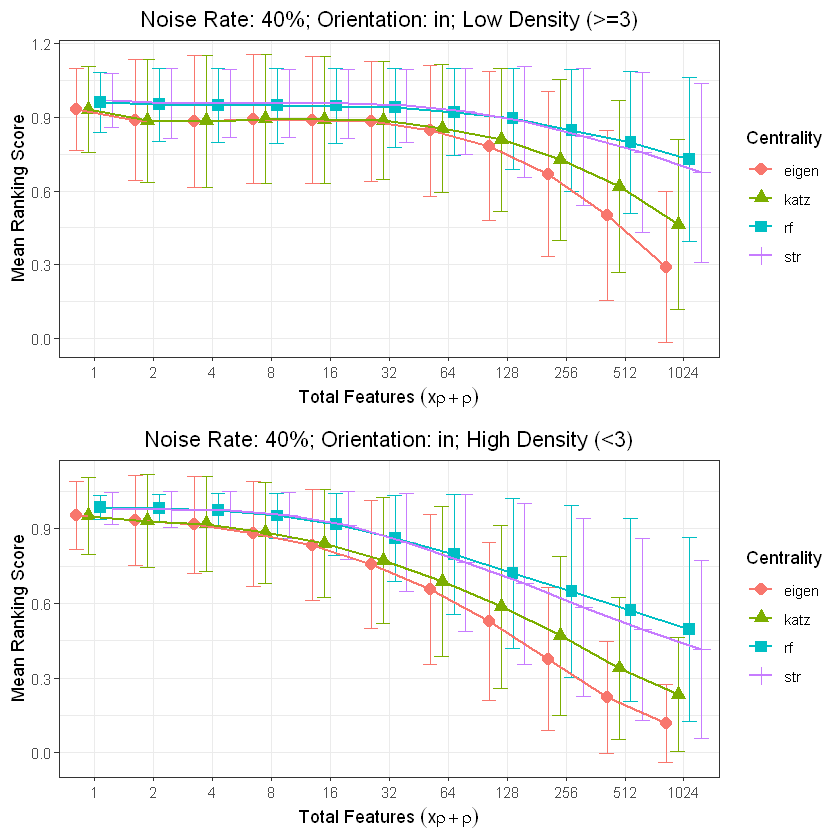

In [12]:
ori   <- 'in'
noi   <- 40
split <- 3 #density

ndc   <- list()
dataset_names <- get_dataset_names(split, dataset_names_all)
ndc[[1]] <- get_ndc(ori, noi, dataset_names[[1]], d3_description = paste0('Low Density (>=',split,')')) #'density>4'
ndc[[2]] <- get_ndc(ori, noi, dataset_names[[2]], d3_description = paste0('High Density (<',split,')')) #'density<4'

#printing amount of datasets in each group
cat('Low Density (>=',split,'): ', length(dataset_names[[1]]), 'datasets\n')
cat('High Density (<',split,'): ', length(dataset_names[[2]]), 'datasets')

p <- get_plot(ndc, measure, visu, plot_output_path, prediction_type, scoring_measure, ori, noi)
g <- arrangeGrob(grobs = p, 
            layout_matrix = rbind(c(1  ),
                                  c(2)))
plot(g)
ggsave(file=paste0(plot_output_path,'_',split,'_',prediction_type,'_',scoring_measure,'_',ori,'_',noi,file_extension), g,width = 10, height = 10)

In [ ]:
#finishes here

# ----------------------below its just new plot tests ------------------------------------

## Plotting 3 graphs. 1) full graph; 2)R value 1 to 32; 3) R value 64 to 1024

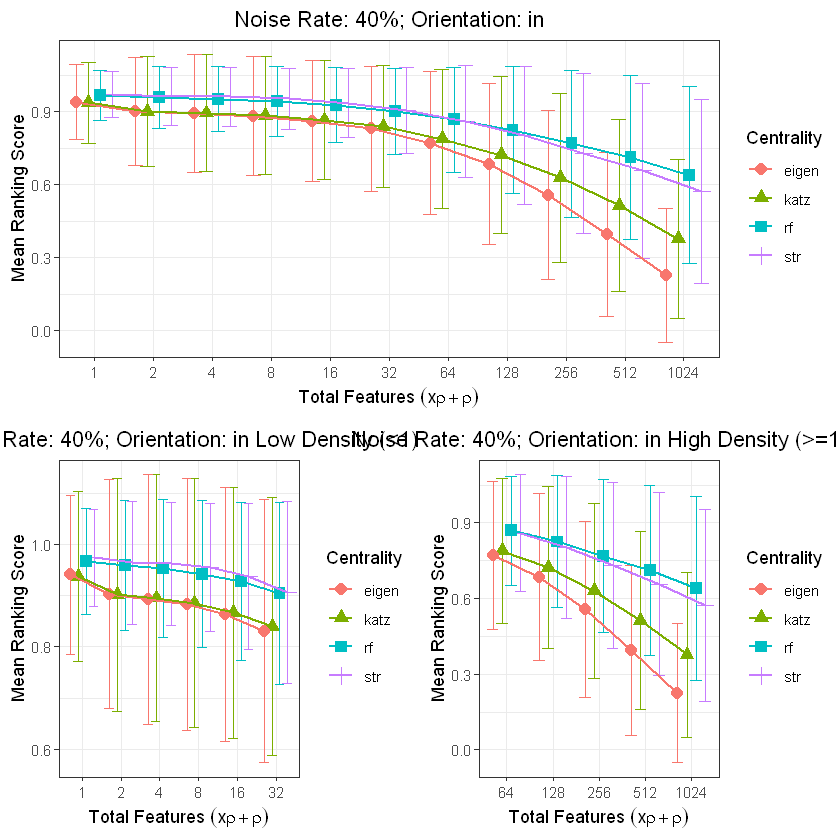

In [13]:
noi <- 40
ori <- 'in'

ndc <- list()
ndc[[1]] <- subset(vec_newformat, noise == noi & (orientation == ori | centrality_or_forest == "f"))
ndc[[1]]$title <- paste0('Noise Rate: ', noi,'%;', ' Orientation: ', ori)

ndc[[2]] <- subset(ndc[[1]], R <= 32)
ndc[[2]]$title <- paste0('Noise Rate: ', noi,'%;', ' Orientation: ', ori, ' Low Density (<1)')

ndc[[3]] <- subset(ndc[[1]], R > 32)
ndc[[3]]$title <- paste0('Noise Rate: ', noi,'%;', ' Orientation: ', ori, ' High Density (>=1)')

measure = 'mean' # 'median'  'mean'
visu    = 'points' #'points' 'boxplot'
p <- list()
i <- 1
for (data_subset in ndc){
    dataset <- data_subset
    x_data <- as.factor(data_subset$R)
    y_data <- data_subset$value
    group_by_data <- data_subset$centrality
    group_by_label <- 'Centrality'
    
    p[[i]] <- cantao_plot(dataset = data_subset,
                          x_data = as.factor(data_subset$R),
                          y_data = data_subset$value,
                          group_by_data = data_subset$centrality,
                          group_by_label = 'Centrality',
                          measure,
                          visu)
    i=i+1
}

# arrange to plot
grid.arrange(
  grobs = p,
  layout_matrix = rbind(c(1),
                        c(2, 3))
)

# ggsave(file=paste0('E:/Mestrado_ranker/R_output_analisys/plots/split_plot/','split32_classification_binary_rs3_in_40.pdf'), g,width = 10, height = 10)

### plotting all ndc values ... noi in c(5,10,20,40) and ori in c("g", "in", "out") .. using BOXPLOT